In [42]:
import librosa
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import collections


samples, fs = librosa.load(r"/Users/noahthompson/Desktop/Music/BWSI Music/David Bowie - Life on Mars.mp3", sr=44100, mono=True)

%matplotlib notebook

<IPython.core.display.Javascript object>


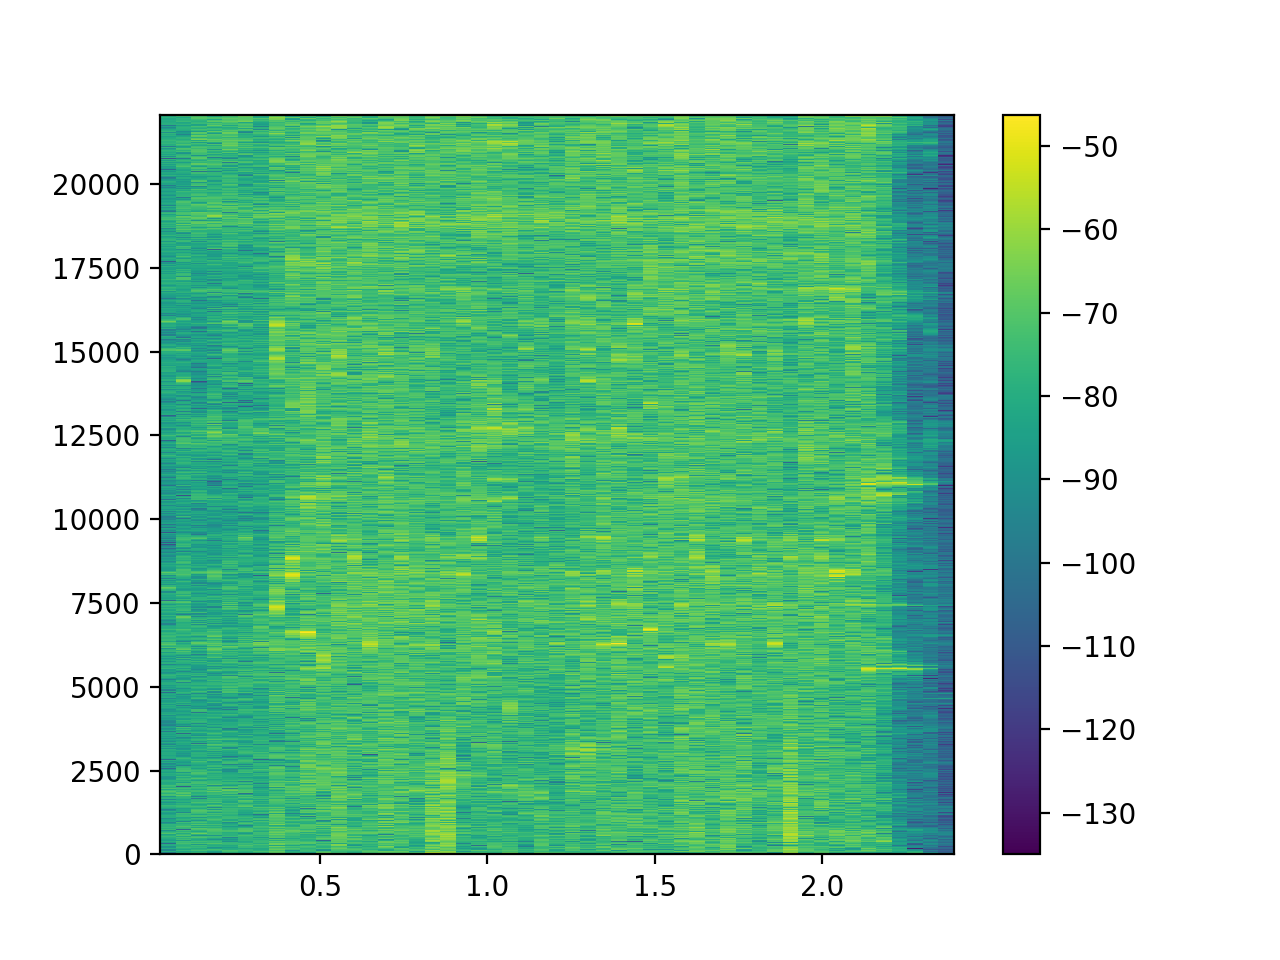

In [32]:
thinned = samples[::100]
fig, ax = plt.subplots()
S, freqs, times, im = ax.specgram(thinned, NFFT=4096, Fs=fs,
                                                      window=mlab.window_hanning,
                                                      noverlap=(4096 // 2))
fig.colorbar(im) # adds colorbar to figure

In [49]:
#format of dict entries ––> (f1,f2,dt): ["song name", t1] 

def match(replace, excerpt):#Noah write this
        """
        matches a list of peak distances from a specific song to the song database
        """
        songGradient = collections.Counter()#counter of songs and number of consistent offset matches
        for song in replace:
            songGradient['song'] = 0

        for d in excerpt:
            offset = 0
            if ((d[0][0],d[0][1],d[0][2])) in replace:
                offset = d[0][2] - excerpt.get(d, None)
            songGradient[offset] += 1
        return songGradient.most_common(1)
                                         
                            
                                         
x = match({(1,2,3):[1,2], (2,3,1):[3,4]}, {(1,2,3):[1,2], (2,3,1):[3,4]})

print(x)

TypeError: 'int' object is not subscriptable

In [72]:
import itertools
def deleteSong(data, title, number = None):
        """
         a song from the database by title  
        """
        
        newdata = {}
        for k in data:
            if data[k][0] != title:
                print(data[k][0], " does not equal ", title)
                newdata[k] = data[k]
        
        data = newdata
        
data = {(1,1,3):("song", "artist", 1),
       (1,2,3):("song1", "artist3", 1),
       (1,3,3):("song2", "artist1", 1),
       (1,4,3):("song3", "artist", 1),
       (1,5,3):("song4", "artist1", 1),
       (1,6,3):("song5", "artist3", 1)}

deleteSong(data, "song")

data

song4  does not equal  song
song5  does not equal  song
song3  does not equal  song
song2  does not equal  song
song1  does not equal  song


{(1, 1, 3): ('song', 'artist', 1),
 (1, 2, 3): ('song1', 'artist3', 1),
 (1, 3, 3): ('song2', 'artist1', 1),
 (1, 4, 3): ('song3', 'artist', 1),
 (1, 5, 3): ('song4', 'artist1', 1),
 (1, 6, 3): ('song5', 'artist3', 1)}